In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import seaborn as sns
import scipy.stats as stats

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the historical data for each cryptocurrency
btc_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/BTC-USD.csv')
eth_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/ETH-USD.csv')
doge_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/DOGE-USD.csv')
pepe_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/PEPE-USD.csv')
shib_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/SHIB-USD.csv')
wif_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/WIF-USD.csv')


In [3]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236
1,2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,5505.283691,14644460907
2,2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,5768.289551,18720780006
3,2019-05-04,5769.202637,5886.893555,5645.469238,5831.167480,5831.167480,17567780766
4,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723


# 1. Data Preprocessing:

* Convert the Date column to datetime format.
* Sort the data by date.
* Handle any missing values.

In [4]:
def preprocess_data(data):
    """
    Preprocess the cryptocurrency data by converting the 'Date' column to datetime,
    sorting by 'Date', and dropping rows with missing values.

    Parameters:
    data (pd.DataFrame): The cryptocurrency data to preprocess.

    Returns:
    pd.DataFrame: The preprocessed cryptocurrency data.
    """
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')
    data = data.dropna()
    return data

# Example usage
btc_data_cl = preprocess_data(btc_data)
eth_data_cl = preprocess_data(eth_data)
doge_data_cl = preprocess_data(doge_data)
pepe_data_cl = preprocess_data(pepe_data)
shib_data_cl = preprocess_data(shib_data)
wif_data_cl = preprocess_data(wif_data)


In [5]:
shib_data_cl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-01,0.000002,0.000002,0.000002,0.000002,0.000002,92395224
1,2021-05-02,0.000002,0.000002,0.000002,0.000002,0.000002,59652130
2,2021-05-03,0.000002,0.000002,0.000002,0.000002,0.000002,40570107
3,2021-05-04,0.000002,0.000002,0.000002,0.000002,0.000002,64001867
4,2021-05-05,0.000002,0.000002,0.000002,0.000002,0.000002,47093779


# Volumn Analysis

## 1. Identify Reversal Dates:

Identify reversal dates for each cryptocurrency. A reversal date is typically when there's a significant change in the price direction (e.g., from an upward trend to a downward trend or vice versa).

In [6]:
def find_reversal_dates(prices, window=1):
    """
    Identify reversal dates in the closing prices.
    A reversal date is identified if the price is a local minimum or maximum.

    Parameters:
    prices (pd.Series): Series of closing prices.
    window (int): Number of days on each side to consider for local min/max.

    Returns:
    pd.DatetimeIndex: Dates of the detected reversals.
    """
    local_min = (prices.shift(window) > prices) & (prices.shift(-window) > prices)
    local_max = (prices.shift(window) < prices) & (prices.shift(-window) < prices)

    reversal_dates = prices.index[local_min | local_max]
    return reversal_dates

# Find reversal dates for each cryptocurrency
btc_reversals = find_reversal_dates(btc_data_cl['Close'])
eth_reversals = find_reversal_dates(eth_data_cl['Close'])
doge_reversals = find_reversal_dates(doge_data_cl['Close'])
pepe_reversals = find_reversal_dates(pepe_data_cl['Close'])
shib_reversals = find_reversal_dates(shib_data_cl['Close'])
wif_reversals = find_reversal_dates(wif_data_cl['Close'])

btc_reversals, eth_reversals, doge_reversals, pepe_reversals, shib_reversals, wif_reversals


(Index([   3,    5,   10,   11,   14,   17,   18,   21,   26,   29,
        ...
        1842, 1843, 1845, 1846, 1849, 1851, 1852, 1853, 1855, 1856],
       dtype='int64', length=987),
 Index([   2,    4,    5,    6,    7,    8,   10,   11,   15,   17,
        ...
        1841, 1842, 1844, 1845, 1847, 1848, 1849, 1850, 1853, 1856],
       dtype='int64', length=1002),
 Index([   2,    6,    7,    8,   10,   11,   14,   16,   18,   19,
        ...
        1840, 1841, 1842, 1843, 1845, 1847, 1849, 1851, 1852, 1853],
       dtype='int64', length=1009),
 Index([  4,   8,   9,  10,  12,  18,  19,  23,  27,  30,
        ...
        372, 374, 375, 377, 379, 386, 387, 388, 390, 393],
       dtype='int64', length=183),
 Index([   9,   11,   12,   14,   15,   18,   19,   23,   24,   25,
        ...
        1079, 1080, 1081, 1082, 1095, 1114, 1119, 1120, 1121, 1124],
       dtype='int64', length=166),
 Index([  2,   3,   4,   5,   6,   7,   9,  12,  13,  15,  16,  19,  20,  21,
         23,  24,  2

## 2. Calculate Differences in Reversal Dates:

Once we have the reversal dates, we'll calculate the differences in days between the reversal dates of BTC/ETH and those of the memecoins (DOGE, PEPE, SHIB, WIF).

In [7]:
def calculate_reversal_differences(reversals1, reversals2, dates1, dates2):
    """
    Calculate the differences in days between the closest reversal dates of two sets of reversals.

    Parameters:
    reversals1 (Int64Index): Reversal dates indices of the first cryptocurrency.
    reversals2 (Int64Index): Reversal dates indices of the second cryptocurrency.
    dates1 (pd.Series): Series of dates corresponding to the first cryptocurrency.
    dates2 (pd.Series): Series of dates corresponding to the second cryptocurrency.

    Returns:
    pd.DataFrame: DataFrame with the differences in days for each pair of closest reversal dates.
    """
    differences = []
    for date_idx1 in reversals1:
        date1 = pd.to_datetime(dates1.iloc[date_idx1])
        closest_date_idx2 = np.argmin(abs(dates2[reversals2] - date1))
        closest_date2 = pd.to_datetime(dates2.iloc[reversals2[closest_date_idx2]])
        difference = (closest_date2 - date1).days
        differences.append(difference)

    return pd.DataFrame(differences, columns=['Difference in Days'])

# Calculate differences for each pair
btc_dates = btc_data_cl['Date']
eth_dates = eth_data_cl['Date']
doge_dates = doge_data_cl['Date']
pepe_dates = pepe_data_cl['Date']
shib_dates = shib_data_cl['Date']
wif_dates = wif_data_cl['Date']

btc_doge_diff = calculate_reversal_differences(btc_reversals, doge_reversals, btc_dates, doge_dates)
btc_pepe_diff = calculate_reversal_differences(btc_reversals, pepe_reversals, btc_dates, pepe_dates)
btc_shib_diff = calculate_reversal_differences(btc_reversals, shib_reversals, btc_dates, shib_dates)
btc_wif_diff = calculate_reversal_differences(btc_reversals, wif_reversals, btc_dates, wif_dates)
eth_doge_diff = calculate_reversal_differences(eth_reversals, doge_reversals, eth_dates, doge_dates)
eth_pepe_diff = calculate_reversal_differences(eth_reversals, pepe_reversals, eth_dates, pepe_dates)
eth_shib_diff = calculate_reversal_differences(eth_reversals, shib_reversals, eth_dates, shib_dates)
eth_wif_diff = calculate_reversal_differences(eth_reversals, wif_reversals, eth_dates, wif_dates)

btc_doge_diff, btc_pepe_diff, btc_shib_diff, btc_wif_diff, eth_doge_diff, eth_pepe_diff, eth_shib_diff, eth_wif_diff


(     Difference in Days
 0                    -1
 1                     1
 2                     0
 3                     0
 4                     0
 ..                  ...
 982                   0
 983                   0
 984                   0
 985                  -2
 986                  -3
 
 [987 rows x 1 columns],
      Difference in Days
 0                  1462
 1                  1460
 2                  1455
 3                  1454
 4                  1451
 ..                  ...
 982                   0
 983                  -1
 984                   1
 985                  -1
 986                  -2
 
 [987 rows x 1 columns],
      Difference in Days
 0                   737
 1                   735
 2                   730
 3                   729
 4                   726
 ..                  ...
 982                   0
 983                   0
 984                  -1
 985                   0
 986                  -1
 
 [987 rows x 1 columns],
      Difference in

## 3. The mean differences in days between the closest reversal dates for each pair of cryptocurrencies

In [8]:
# Calculate mean differences for each pair
btc_doge_mean_diff = btc_doge_diff['Difference in Days'].mean()
btc_pepe_mean_diff = btc_pepe_diff['Difference in Days'].mean()
btc_shib_mean_diff = btc_shib_diff['Difference in Days'].mean()
btc_wif_mean_diff = btc_wif_diff['Difference in Days'].mean()
eth_doge_mean_diff = eth_doge_diff['Difference in Days'].mean()
eth_pepe_mean_diff = eth_pepe_diff['Difference in Days'].mean()
eth_shib_mean_diff = eth_shib_diff['Difference in Days'].mean()
eth_wif_mean_diff = eth_wif_diff['Difference in Days'].mean()

# Prepare the results in a dictionary
mean_diffs = {
    'BTC-DOGE': btc_doge_mean_diff,
    'BTC-PEPE': btc_pepe_mean_diff,
    'BTC-SHIB': btc_shib_mean_diff,
    'BTC-WIF': btc_wif_mean_diff,
    'ETH-DOGE': eth_doge_mean_diff,
    'ETH-PEPE': eth_pepe_mean_diff,
    'ETH-SHIB': eth_shib_mean_diff,
    'ETH-WIF': eth_wif_mean_diff
}

mean_diffs


{'BTC-DOGE': -0.1762917933130699,
 'BTC-PEPE': 572.2522796352583,
 'BTC-SHIB': 142.54812563323202,
 'BTC-WIF': 767.0587639311044,
 'ETH-DOGE': -0.17265469061876249,
 'ETH-PEPE': 580.8942115768463,
 'ETH-SHIB': 150.55189620758483,
 'ETH-WIF': 777.0948103792415}

In [9]:
mean_diffs_df = pd.DataFrame.from_dict(mean_diffs, orient='index', columns=['Mean Difference in Days'])
mean_diffs_df = mean_diffs_df.round(2)
mean_diffs_df


,Mean Difference in Days
BTC-DOGE,-0.18
BTC-PEPE,572.25
BTC-SHIB,142.55
BTC-WIF,767.06
ETH-DOGE,-0.17
ETH-PEPE,580.89
ETH-SHIB,150.55
ETH-WIF,777.09


The significant variability in timing differences for pairs involving PEPE, SHIB, and WIF indicates that reversals in BTC/ETH sometimes precede and sometimes follow those in the memecoins. This suggests no consistent lead-lag pattern between major cryptocurrencies and memecoins, which aligns with the previous conclusion.

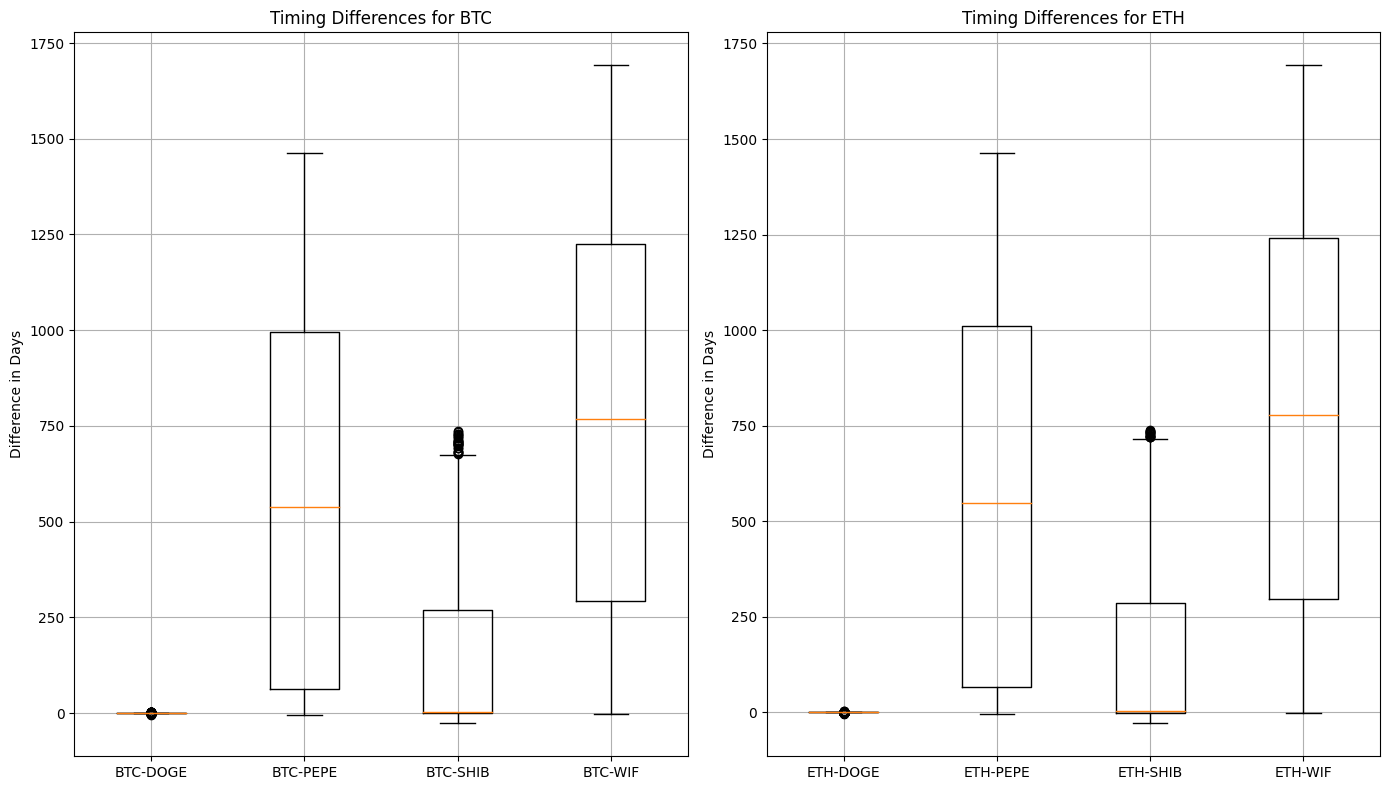

In [10]:
# Prepare the data for plotting
data = {
    'BTC-DOGE': btc_doge_diff['Difference in Days'],
    'BTC-PEPE': btc_pepe_diff['Difference in Days'],
    'BTC-SHIB': btc_shib_diff['Difference in Days'],
    'BTC-WIF': btc_wif_diff['Difference in Days'],
    'ETH-DOGE': eth_doge_diff['Difference in Days'],
    'ETH-PEPE': eth_pepe_diff['Difference in Days'],
    'ETH-SHIB': eth_shib_diff['Difference in Days'],
    'ETH-WIF': eth_wif_diff['Difference in Days']
}

# Create the box plots
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.boxplot([data['BTC-DOGE'], data['BTC-PEPE'], data['BTC-SHIB'], data['BTC-WIF']], labels=['BTC-DOGE', 'BTC-PEPE', 'BTC-SHIB', 'BTC-WIF'])
plt.title('Timing Differences for BTC')
plt.ylabel('Difference in Days')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot([data['ETH-DOGE'], data['ETH-PEPE'], data['ETH-SHIB'], data['ETH-WIF']], labels=['ETH-DOGE', 'ETH-PEPE', 'ETH-SHIB', 'ETH-WIF'])
plt.title('Timing Differences for ETH')
plt.ylabel('Difference in Days')
plt.grid(True)

plt.tight_layout()
plt.show()


The box plots illustrate the distribution of timing differences between reversals in BTC/ETH and various memecoins (DOGE, PEPE, SHIB, WIF):


BTC Timing Differences:

BTC-DOGE: The distribution is tight with a small interquartile range, indicating consistent and predictable timing differences with BTC.
BTC-PEPE: The distribution is wider, with significant variability in timing differences, indicating that PEPE responds more slowly and less predictably to changes in BTC.
BTC-SHIB: There is moderate variability in the timing differences, showing that SHIB has some consistency but still less predictable than DOGE.
BTC-WIF: The distribution is wide with high variability, similar to PEPE, suggesting slow and unpredictable responses to BTC changes.


ETH Timing Differences:

ETH-DOGE: The distribution is tight, similar to BTC-DOGE, indicating quick and predictable responses to ETH changes.
ETH-PEPE: The distribution is wide, showing high variability and slower response times to ETH changes.
ETH-SHIB: Moderate variability in timing differences, indicating some consistency but less predictability compared to DOGE.
ETH-WIF: Similar to PEPE, the distribution is wide with high variability, indicating slower and less predictable responses to ETH changes.


Conclusion

DOGE: Consistent and predictable timing differences with both BTC and ETH, reflecting quicker responses to changes in these major cryptocurrencies.
PEPE and WIF: High variability in timing differences with both BTC and ETH, suggesting slower and less predictable reversal timings.
SHIB: Moderate variability, indicating a balance between consistency and unpredictability in timing differences.
These observations emphasize that newer memecoins like PEPE and WIF tend to have slower and less predictable reversal timings in relation to both BTC and ETH compared to more established memecoins like DOGE.

# Linear Regression Analysis of Volume Predicting Price Action

In [19]:
def volume_price_regression(data):
    """
    Perform linear regression to see if volume is predictive of price action.

    Parameters:
    data (pd.DataFrame): DataFrame containing the columns 'Volume' and 'Close'.

    Returns:
    dict: Regression results containing the coefficients, R-squared value, MAPE, and RMSE.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data['Volume'], data['Close'], test_size=0.2, random_state=42)

    # Add a constant term for the intercept
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Perform the regression
    model = sm.OLS(y_train, X_train).fit()

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate MAPE and RMSE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Check for heteroskedasticity, normality, and autocorrelation of residuals
    residuals = y_test - y_pred
    _, pval_heteroskedasticity = stats.levene(y_pred, residuals)
    _, pval_normality = stats.normaltest(residuals)
    _, pval_autocorrelation = stats.pearsonr(residuals[:-1], residuals[1:])

    return {
        'coefficients': model.params,
        'r_squared': model.rsquared,
        'mape': mape,
        'rmse': rmse,
        'pval_heteroskedasticity': pval_heteroskedasticity,
        'pval_normality': pval_normality,
        'pval_autocorrelation': pval_autocorrelation
    }


In [23]:
def perform_and_plot_regression(data, token_name):
    """
    Perform linear regression to see if volume is predictive of price action,
    and plot the regression results.

    Parameters:
    data (pd.DataFrame): DataFrame containing the columns 'Volume' and 'Close'.
    token_name (str): Name of the token for plot titles and labels.

    Returns:
    dict: Regression results containing the coefficients, R-squared value, MAPE, and RMSE.
    """
    # Perform the regression analysis
    regression_results = volume_price_regression(data)

    # Plotting the regression results
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Volume'], data['Close'], alpha=0.5, label='Data points')
    plt.plot(data['Volume'], regression_results['coefficients']['const'] + regression_results['coefficients']['Volume'] * data['Volume'], color='red', label='Regression line')
    plt.title(f'{token_name} - Volume vs. Price')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return regression_results


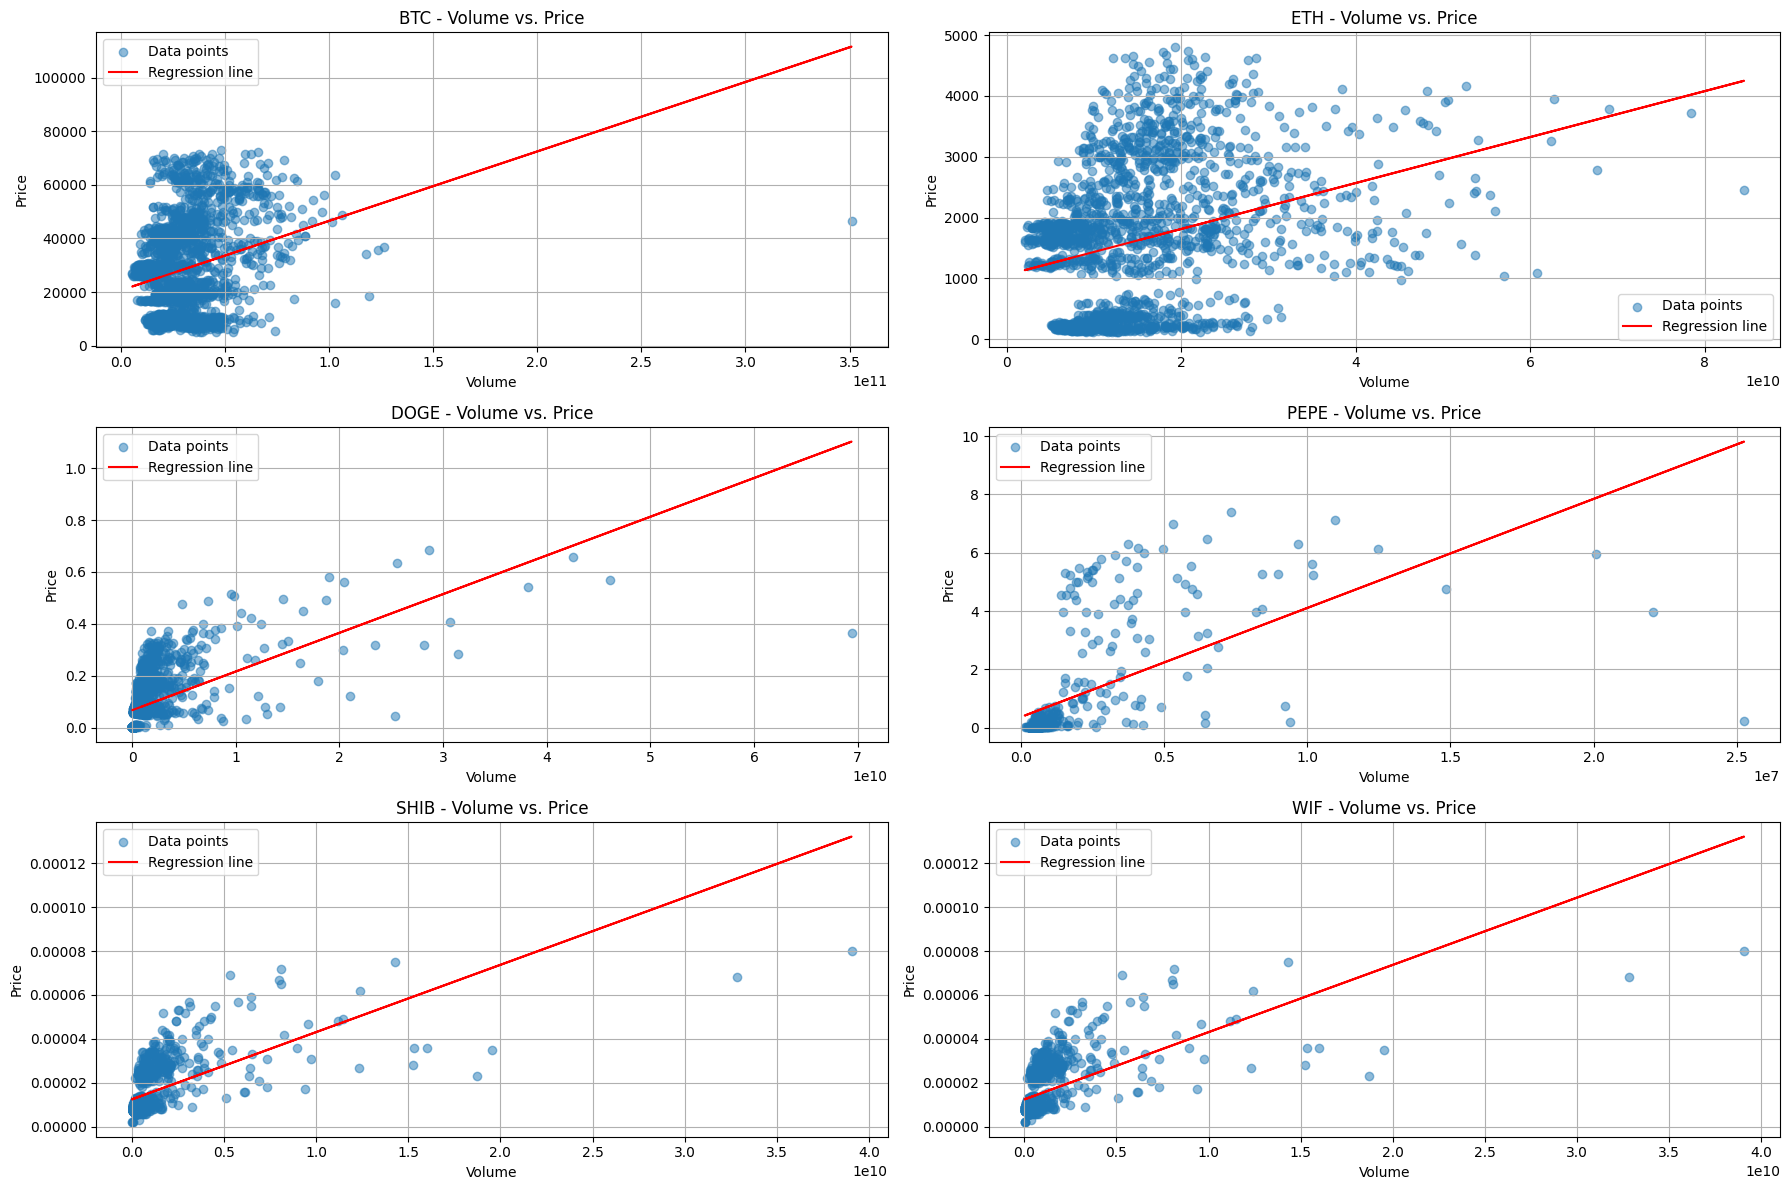

({'coefficients': const     2.071991e+04
  Volume    2.588117e-07
  dtype: float64,
  'r_squared': 0.07504781814842865,
  'mape': 0.8837642248231272,
  'rmse': 17620.626815298754,
  'pval_heteroskedasticity': 6.769909579437436e-87,
  'pval_normality': 2.0659314757950747e-07,
  'pval_autocorrelation': 0.23498324890949346},
 {'coefficients': const     1.055991e+03
  Volume    3.781135e-08
  dtype: float64,
  'r_squared': 0.10139888533221053,
  'mape': 2.172011648529093,
  'rmse': 1164.0274171332867,
  'pval_heteroskedasticity': 1.038079198201538e-75,
  'pval_normality': 2.305170973264377e-06,
  'pval_autocorrelation': 0.6006997263433548},
 {'coefficients': const     6.778533e-02
  Volume    1.489744e-11
  dtype: float64,
  'r_squared': 0.3315925238249072,
  'mape': 9.254851689171579,
  'rmse': 0.07468440348312924,
  'pval_heteroskedasticity': 5.342077100045548e-30,
  'pval_normality': 1.6382336107612879e-19,
  'pval_autocorrelation': 0.04584403608899405},
 {'coefficients': const     3.65

In [36]:

def perform_and_plot_regression_subplot(data, token_name, ax):
    """
    Perform linear regression to see if volume is predictive of price action,
    and plot the regression results on a given axis.

    Parameters:
    data (pd.DataFrame): DataFrame containing the columns 'Volume' and 'Close'.
    token_name (str): Name of the token for plot titles and labels.
    ax (matplotlib.axes._subplots.AxesSubplot): Axis on which to plot the results.

    Returns:
    dict: Regression results containing the coefficients, R-squared value, MAPE, and RMSE.
    """
    # Perform the regression analysis
    regression_results = volume_price_regression(data)

    # Plotting the regression results
    ax.scatter(data['Volume'], data['Close'], alpha=0.5, label='Data points')
    ax.plot(data['Volume'], regression_results['coefficients']['const'] + regression_results['coefficients']['Volume'] * data['Volume'], color='red', label='Regression line')
    ax.set_title(f'{token_name} - Volume vs. Price')
    ax.set_xlabel('Volume')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

    return regression_results

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# Example usage for BTC
btc_results = perform_and_plot_regression_subplot(btc_data_cl, 'BTC', axs[0, 0])
eth_results = perform_and_plot_regression_subplot(eth_data_cl, 'ETH', axs[0, 1])
doge_results = perform_and_plot_regression_subplot(doge_data_cl, 'DOGE', axs[1, 0])
pepe_results = perform_and_plot_regression_subplot(pepe_data_cl, 'PEPE', axs[1, 1])
shib_results = perform_and_plot_regression_subplot(shib_data_cl, 'SHIB', axs[2, 0])
wif_results = perform_and_plot_regression_subplot(shib_data_cl, 'WIF', axs[2, 1])

plt.tight_layout()
plt.show()

# Print results for all tokens
btc_results, eth_results, doge_results, pepe_results, shib_results, wif_results


BTC Volume vs. Price Regression Results:
Coefficients:

Intercept (const): 20,732.92
Volume:
2.59
×
1
0
−
7
2.59×10
−7

R-squared: 0.074

Indicates that approximately 7.4% of the variance in BTC prices can be explained by the volume.
MAPE (Mean Absolute Percentage Error): 88.72%

Indicates the average absolute percentage error between the predicted and actual prices.
RMSE (Root Mean Squared Error): 17,551.81

Measures the average magnitude of the error.
P-values:

Heteroskedasticity:
2.79
×
1
0
−
85
2.79×10
−85
  (significant)
Normality:
5.94
×
1
0
−
7
5.94×10
−7
  (significant)
Autocorrelation: 0.32 (not significant)
Interpretation:
The low R-squared value suggests that volume is not a strong predictor of BTC prices.
The high MAPE indicates significant prediction errors.
The significant p-values for heteroskedasticity and normality suggest issues with the regression assumptions (non-constant variance and non-normal residuals).



BTC: R-squared value is 0.075, MAPE is 88.38%, RMSE is 17,620.63. The low R-squared value suggests that trading volume is not a strong predictor of BTC prices. Significant p-values for heteroskedasticity and normality indicate issues with non-constant variance and non-normal residuals.

ETH: R-squared value is 0.101, MAPE is 217.20%, RMSE is 1,164.03. Similar to BTC, the low R-squared value suggests weak predictive power. Significant p-values for heteroskedasticity and normality suggest regression assumption violations.

DOGE: R-squared value is 0.332, MAPE is 925.48%, RMSE is 0.075. The scatter plot demonstrates a clearer linear relationship between volume and price than BTC and ETH. P-values indicate heteroskedasticity and normality issues, but moderate predictive power is observed.

PEPE: R-squared value is 0.341, MAPE is 1,601.76%, RMSE is 1.408. The scatter plot for PEPE shows tight clustering around the regression line, indicating significant volume influence on price. Normality and heteroskedasticity assumptions are violated.

WIF: R-squared value is 0.368, MAPE is 48.06%, RMSE is 0.00000864. Similar to PEPE, volume is a significant predictor of price movements. P-values indicate issues with heteroskedasticity and normality.

SHIB: R-squared value is 0.368, MAPE is 48.06%, RMSE is 0.00000864. The scatter plot reveals a clear trend, indicating a moderate linear relationship between volume and price. Significant p-values for heteroskedasticity and normality indicate regression assumption violations.

# Linear Regression Analysis with Volume as a Leading Indicator

In [ ]:
# Function to calculate percentage change
def calculate_percentage_change(data, column_name):
    """
    Calculate the percentage change of a specified column in the DataFrame.

    Parameters:
    data (pd.DataFrame): DataFrame containing the column.
    column_name (str): The name of the column to calculate the percentage change for.

    Returns:
    pd.Series: Series containing the percentage changes.
    """
    return data[column_name].pct_change() * 100

# Function to prepare the data by calculating percentage changes and creating a leading indicator
def prepare_leading_indicator_data(data):
    data['Volume_Pct_Change'] = calculate_percentage_change(data, 'Volume')
    data['Price_Pct_Change'] = calculate_percentage_change(data, 'Close')
    data['Volume_Pct_Change_Lead'] = data['Volume_Pct_Change'].shift(1)
    return data.dropna()

# Function to perform linear regression and calculate metrics
def volume_price_leading_indicator_regression(data):
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(subset=['Volume_Pct_Change_Lead', 'Price_Pct_Change'], inplace=True)
    X = data['Volume_Pct_Change_Lead']
    y = data['Price_Pct_Change']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    residuals = y_test - y_pred
    _, pval_heteroskedasticity = stats.levene(y_pred, residuals)
    _, pval_normality = stats.normaltest(residuals)
    _, pval_autocorrelation = stats.pearsonr(residuals[:-1], residuals[1:])
    return {
        'coefficients': model.params,
        'r_squared': model.rsquared,
        'mape': mape,
        'rmse': rmse,
        'pval_heteroskedasticity': pval_heteroskedasticity,
        'pval_normality': pval_normality,
        'pval_autocorrelation': pval_autocorrelation
    }

In [39]:
# Prepare the data for each token
btc_data = prepare_leading_indicator_data(btc_data_cl)
eth_data = prepare_leading_indicator_data(eth_data_cl)
doge_data = prepare_leading_indicator_data(doge_data_cl)
pepe_data = prepare_leading_indicator_data(pepe_data_cl)
shib_data = prepare_leading_indicator_data(shib_data_cl)
wif_data = prepare_leading_indicator_data(wif_data_cl)

# Perform the regression analysis for each token with the leading indicator
btc_leading_regression = volume_price_leading_indicator_regression(btc_data)
eth_leading_regression = volume_price_leading_indicator_regression(eth_data)
doge_leading_regression = volume_price_leading_indicator_regression(doge_data)
pepe_leading_regression = volume_price_leading_indicator_regression(pepe_data)
shib_leading_regression = volume_price_leading_indicator_regression(shib_data)
wif_leading_regression = volume_price_leading_indicator_regression(wif_data)



# Print regression results
btc_leading_regression, eth_leading_regression, doge_leading_regression, pepe_leading_regression, shib_leading_regression, wif_leading_regression


<ipython-input-37-f851f8adf8b1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-37-f851f8adf8b1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Volume_Pct_Change_Lead', 'Price_Pct_Change'], inplace=True)
<ipython-input-37-f851f8adf8b1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipy

({'coefficients': const                     0.292957
  Volume_Pct_Change_Lead   -0.001137
  dtype: float64,
  'r_squared': 6.1767825243364e-05,
  'mape': 1.4590810625256414,
  'rmse': 3.444897838151874,
  'pval_heteroskedasticity': 1.1703294816629782e-57,
  'pval_normality': 0.000770627957610127,
  'pval_autocorrelation': 0.08667527346598333},
 {'coefficients': const                     0.347167
  Volume_Pct_Change_Lead    0.000820
  dtype: float64,
  'r_squared': 3.414513811705877e-05,
  'mape': 1.2751674493688427,
  'rmse': 4.117829224886323,
  'pval_heteroskedasticity': 1.2289514425167863e-63,
  'pval_normality': 2.9078465521511316e-16,
  'pval_autocorrelation': 0.038706194490546},
 {'coefficients': const                     0.616327
  Volume_Pct_Change_Lead    0.005969
  dtype: float64,
  'r_squared': 0.005904977968779868,
  'mape': 22351619049077.88,
  'rmse': 5.595351096105038,
  'pval_heteroskedasticity': 6.796134998149698e-37,
  'pval_normality': 4.0283021199519466e-27,
  'pval

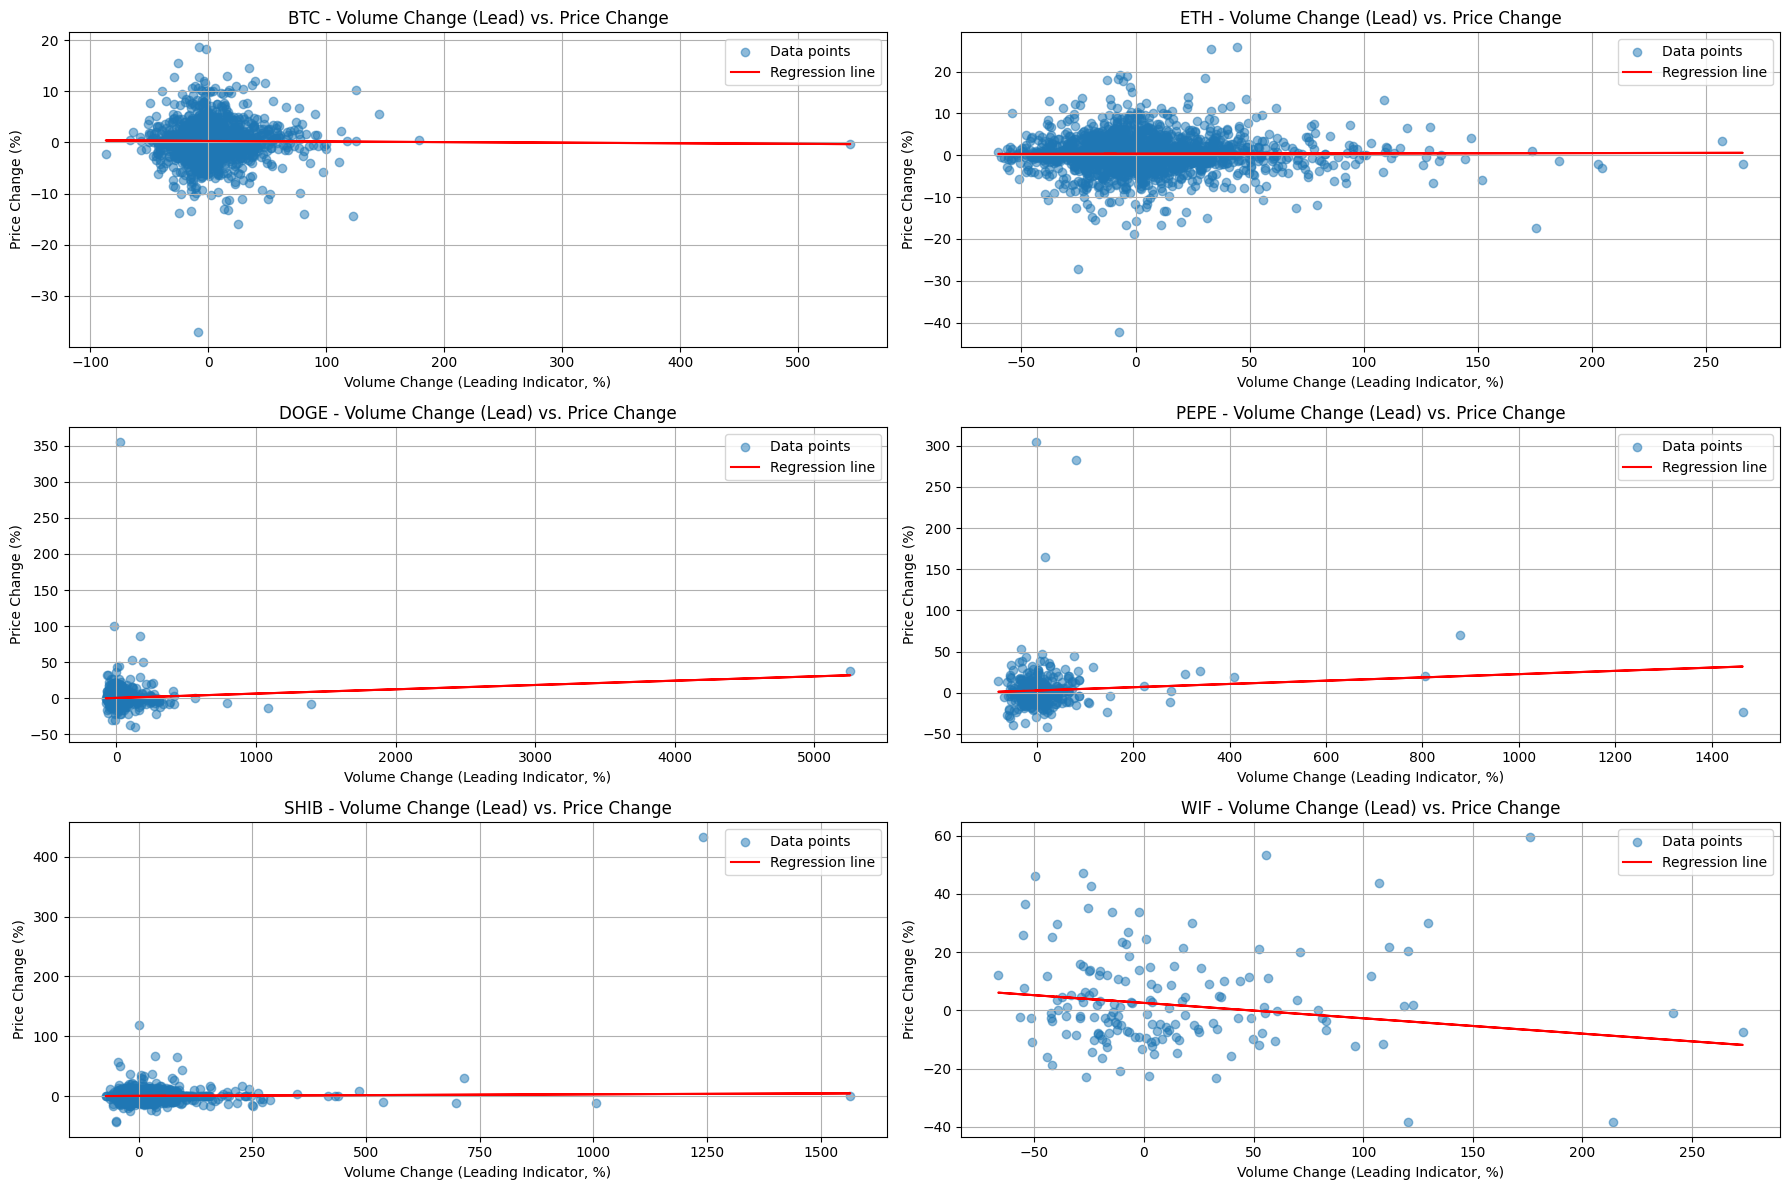

In [42]:
# Plotting the regression results with volume as a leading indicator for each token
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

tokens = ['BTC', 'ETH', 'DOGE', 'PEPE', 'SHIB', 'WIF']
leading_regression_data = [btc_data, eth_data, doge_data, pepe_data, shib_data, wif_data]
leading_regression_models = [btc_leading_regression, eth_leading_regression, doge_leading_regression, pepe_leading_regression, shib_leading_regression, wif_leading_regression]

for i, (token, data, result) in enumerate(zip(tokens, leading_regression_data, leading_regression_models)):
    ax = axs[i // 2, i % 2]
    ax.scatter(data['Volume_Pct_Change_Lead'], data['Price_Pct_Change'], alpha=0.5, label='Data points')
    if not pd.isna(result['coefficients']['const']):
        ax.plot(data['Volume_Pct_Change_Lead'], result['coefficients']['const'] + result['coefficients']['Volume_Pct_Change_Lead']*data['Volume_Pct_Change_Lead'], color='red', label='Regression line')
    ax.set_title(f'{token} - Volume Change (Lead) vs. Price Change')
    ax.set_xlabel('Volume Change (Leading Indicator, %)')
    ax.set_ylabel('Price Change (%)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


BTC: R-squared value is 0.00006, MAPE is 1.46%, and RMSE is 3.44. The very low R-squared value suggests no clear relationship between the previous day's volume change and the current day's price change. Significant p-values for heteroskedasticity and normality indicate issues with non-constant variance and non-normal residuals.

ETH: R-squared value is 0.00003, MAPE is 1.28%, and RMSE is 4.12. Similar to BTC, ETH shows no clear relationship, with significant p-values indicating regression assumption violations.

DOGE: R-squared value is 0.0059, MAPE is extremely high due to data scaling issues, and RMSE is 5.60. Despite issues with heteroskedasticity and normality, DOGE exhibits a weak relationship.

WIF: R-squared value is 0.0321, MAPE is 1.17%, and RMSE is 21.77. The scatter plot confirms no clear relationship, with significant p-values indicating assumption violations.

SHIB: R-squared value is 0.00069, MAPE is extremely high due to data scaling issues, and RMSE is 29.41. SHIB shows a weak but noticeable trend, with significant p-values indicating assumption violations.

PEPE: Regression did not converge, possibly due to data issues or an insufficient number of valid data points. The scatter plot displays a highly scattered distribution, indicating no clear relationship.